This jupyter notebook contains some of the codes and calculations associated with our recent paper: "The VLT-MUSE and ALMA view of the MACS 1931.8-2635 brightest cluster galaxy" -Ciocan B. I. , Ziegler, B. L. , Verdugo, M. , Papaderos, P. , Fogarty, K. , Donahue, M. , and Postman, M.

## How to make nice (emission) maps

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits, ascii
from astropy.table import Table,join
from astropy.wcs import WCS
from mpdaf.obj import Image
import cmasher as cr
import colorcet as cc


Read in table with flux measurements from FADO (or whatever measurements you are interested in)

In [23]:
table=Table.read("/Users/biancaciocan/Documents/M1931_BCG_PROJECT/M1931_results_FADO_python/FADO_joned_finito.txt",delimiter=" ",format='ascii', guess=False)


SN_Ha=table["SN_Ha"]
SN_Ha_cont_red=table["SN_Ha_cont_red"]
SN_Ha_cont_blue=table["SN_Ha_cont_blue"]

p = table['1'][(SN_Ha>10)  & (SN_Ha>SN_Ha_cont_blue)]
q = table['2'][(SN_Ha>10)  & (SN_Ha>SN_Ha_cont_blue)]
galsnorm=table['galsnorm'][(SN_Ha>10)  & (SN_Ha>SN_Ha_cont_blue)]
Halpha_flux = table['163'][(SN_Ha>10)  & (SN_Ha>SN_Ha_cont_blue)]* galsnorm
Halpha_flux_err=table['164'][(SN_Ha>10)  & (SN_Ha>SN_Ha_cont_blue)]


Read in white light image of the sub-cube centred on the BCG

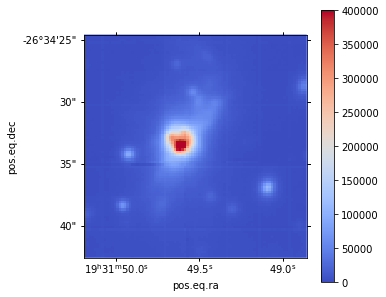

In [24]:
hdu = fits.open("/Users/biancaciocan/Documents/M1931_BCG_PROJECT/M1931_results_FADO_python/subcube_BCG_MACSJ1931_corr_image_wcsshift.fits")

data = hdu[1].data
header = hdu[1].header
wcs = WCS(header)


new_image = np.zeros(shape=data.shape)

fig = plt.figure(figsize=(5,5))
plt.subplot(projection=wcs)
cm=plt.cm.get_cmap('coolwarm')
ax=plt.imshow(data, cmap=cm, vmin=0, vmax=400000, origin='lower') 
cbar=plt.colorbar(ax)

create new image containing flux measurements for Ha

In [25]:
for i, j, v in zip(p,q,Halpha_flux):
    new_image[i, j] = v
   
new_hdu = fits.PrimaryHDU(data=new_image, header=header)
new_hdu.writeto("Ha_flux_map.fits", overwrite=True)

plot the new image

Text(0.5, 1.0, 'H$\\alpha$ flux map')

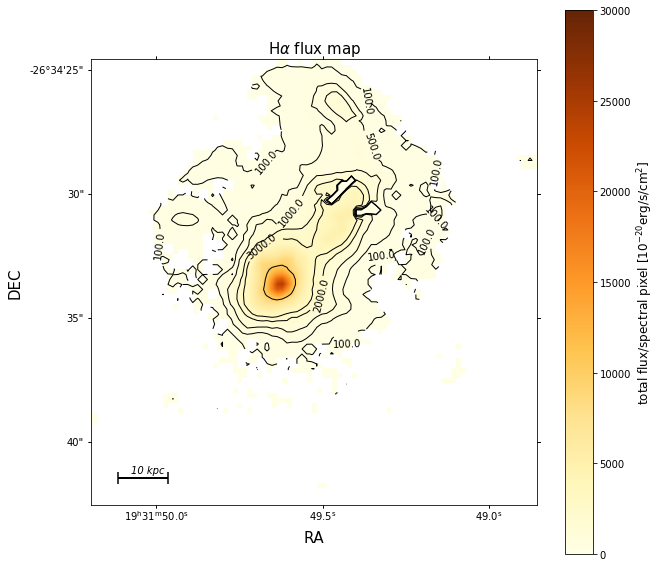

In [17]:
hdu=fits.open("Ha_flux_map.fits")
data=hdu[0].data
data[(data==0)]=np.nan # in order to create a white background
wcs = WCS(header)

fig = plt.figure(figsize=(10,10))
plt.subplot(projection=wcs)

cm = plt.cm.get_cmap("YlOrBr")

ax=plt.imshow(data, origin="lower",cmap=cm, vmin=0, vmax=30000, interpolation='bilinear')
cbar=plt.colorbar(ax)
cbar.set_label(r'total flux/spectral pixel $\rm{[10^{-20} erg/s/cm^{2}}]$', fontsize=12)
plt.xlabel("RA", fontsize=15)
plt.ylabel("DEC", fontsize=15)
plt.hlines(y=5, xmin=5, xmax=15, linewidth=2, color='black')
plt.scatter(5,5, marker=2, color='black')
plt.scatter(5,5, marker=3, color='black')
plt.scatter(15,5, marker=2, color='black')
plt.scatter(15,5, marker=3, color='black')
plt.text(7.5, 6, '10 kpc', style='italic')
levels = [100,500,1000,2000,3000,10000]
CS=plt.contour(data, levels, linewidths=1, colors='k')
plt.clabel(CS, fmt='%1.1f',inline=1, fontsize=10)
plt.title(r'H$\alpha$ flux map', fontsize=15)